<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/02-Prep-Datos-Metricas-Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Preparación de Datos y Métricas de Evaluación
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Sebastián Quijia &bull; 07/12/2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller veremos como aplicar diferentes técnicas para la carga y preparación de datos y las métricas de modelos.
   
Para eso necesitaremos las siguientes librerías:

In [1]:
# Paquetes necesarios

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    silhouette_score,
    davies_bouldin_score
)


---
## <font color='264CC7'> Lectura de Datos </font>


Primero, necesitas cargar el conjunto de datos "Boston house prices", que contiene información sobre el valor de las casas en diferentes áreas de Boston basado en múltiples factores. Este conjunto de datos está disponible para su descarga [aquí](https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data); la descripción de las variables  de puede encontrar [aquí](https://github.com/rupakc/UCI-Data-Analysis/blob/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.names).

En los ejercicios de esta actividad, usaremos como variable objetivo para regresión "MEDV", que representa la mediana del valor de las casas en una zona de Boston (en miles de dólares, k$); y para clasificación, la variable "CHAS", que indica si la casa está cerca del río Charles (1) o no (0).

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos "boston house-prices dataset" y muestra:
<ul>
  <li>El número y nombre de los atributos.</li>
  <li>El número de filas del conjunto de datos.</li>
  <li>Verifica si hay "missing values" y en qué columnas.</li>
</ul>
</div>

In [3]:
# Cargar el dataset Boston Housing
url = "https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data"

columnas = [
    "CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS",
    "RAD","TAX","PTRATIO","B","LSTAT","MEDV"
]

df = pd.read_csv(url, delim_whitespace=True, names=columnas)

print("Dimensiones del dataset:", df.shape)
df.head()


Dimensiones del dataset: (506, 14)


/tmp/ipython-input-1228588435.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columnas)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
# Número y nombre de los atributos
print("Número de atributos:", df.shape[1])
print("Atributos:", list(df.columns))

# Número de filas
print("Número de filas:", df.shape[0])

# Verificación de missing values
print("Missing values")
print(df.isnull().sum())

Número de atributos: 14
Atributos: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Número de filas: 506
Missing values
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


---
## <font color='264CC7'> Análisis de los datos </font>

### <font color='264CC7'> Análisis estadístico básico </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un análisis estadístico básico:
<br>

<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calcula la frecuencia.</li>
      <li>Realiza un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calcula estadísticos descriptivos básicos como media, mediana, desviación estándar, entre otros.</li>
      <li>Realiza un histograma para las variables INDUS, AGE y MEDV.</li>
    </ul>
</ul>
    
<hr>
Sugerencia: Puedes usar la librería 'pandas' y sus funciones 'describe' y 'value_counts', así como las funciones 'bar' e 'hist' de matplotlib.
</div>


CHAS
0    471
1     35
Name: count, dtype: int64


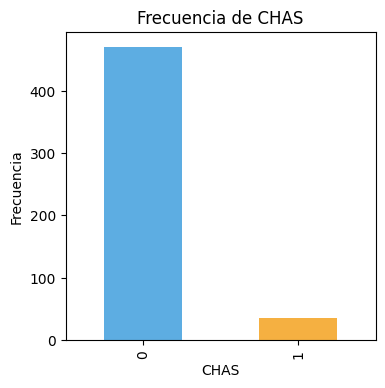

In [5]:
# Frecuencia de la variable CHAS
freq_chas = df['CHAS'].value_counts()
print(freq_chas)

# Gráfico de barras
plt.figure(figsize=(4, 4))
freq_chas.plot(kind='bar', color=['#5DADE2', '#F5B041'])
plt.title('Frecuencia de CHAS')
plt.xlabel('CHAS')
plt.ylabel('Frecuencia')
plt.show()


In [6]:
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


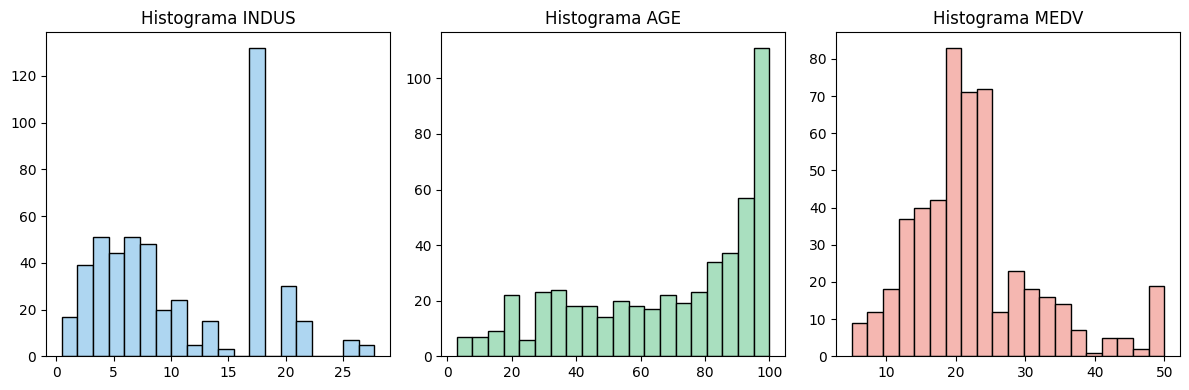

In [7]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(df['INDUS'], bins=20, color='#AED6F1', edgecolor='black')
plt.title('Histograma INDUS')

plt.subplot(1, 3, 2)
plt.hist(df['AGE'], bins=20, color='#A9DFBF', edgecolor='black')
plt.title('Histograma AGE')

plt.subplot(1, 3, 3)
plt.hist(df['MEDV'], bins=20, color='#F5B7B1', edgecolor='black')
plt.title('Histograma MEDV')

plt.tight_layout()
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
Comenta los resultados.
</div>

Al revisar las dimensiones del dataset, observamos que cuenta con 506 registros y 14 atributos, lo cual es suficiente para realizar un análisis inicial sin caer en problemas de tamaño. Además, el dataset no presenta valores faltantes, lo que facilita la preparación de datos sin necesidad de imputaciones.

La variable categórica CHAS muestra un desproporción significativa, solo 35 viviendas están cerca del río Charles. Esto quiere decir que, si se usa esta variable como objetivo en un modelo supervisado, debemos considerar técnicas que reduzcan el impacto del desbalance.

En cuanto a las variables numéricas, los histogramas dejan ver diferentes comportamientos. INDUS presenta una distribución dispersa con varias concentraciones según el tipo de zona, mientras que AGE está claramente sesgada hacia valores altos, indicando que muchas viviendas pertenecen a zonas antiguas. Por otro lado, la variable objetivo MEDV se aproxima a una forma normal, pero muestra un grupo considerable de valores en el límite superior (50), lo que sugiere un “techo” en la medición.

Los estadísticos descriptivos confirman estas tendencias: varias variables tienen rangos muy amplios y presencia de valores extremos, especialmente CRIM, TAX y AGE. Esto es importante porque diferentes escalas y outliers pueden afectar negativamente a muchos modelos de machine learning. Por esta razón, será necesario aplicar algún tipo de escalamiento antes de entrenar modelos.

En conjunto, estos resultados muestran que el dataset está limpio, pero combina variables con escalas muy distintas y distribuciones heterogéneas, lo que requiere preprocesamiento adecuado antes de construir cualquier modelo predictivo.

### <font color='264CC7'> Análisis exploratorio de los datos </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un gráfico del histograma de valores de la variable MEDV, separado por los posibles valores de CHAS. Para comparar mejor los valores de MEDV según las diferentes clases de CHAS, los histogramas deben estar sobrepuestos. Agrega una leyenda para identificar a qué clase corresponde cada histograma.
    
El objetivo es observar cómo se distribuye el valor de la respuesta MEDV en función de la clase CHAS, para identificar visualmente si este atributo categórico está relacionado con diferentes valores de la respuesta.
    
<hr>
Sugerencia: Usa la función "hist" de la librería "matplotlib", utilizando el parámetro "alpha" para que se aprecien los histogramas sobrepuestos.<br>
Sugerencia: Para una mejor comparación, considera representar la densidad de probabilidad en lugar del número de entradas por bin. Esto permite usar la misma escala para cada clase y facilita la comparación. Puedes usar el parámetro "density" de la misma función "hist".  
</div>

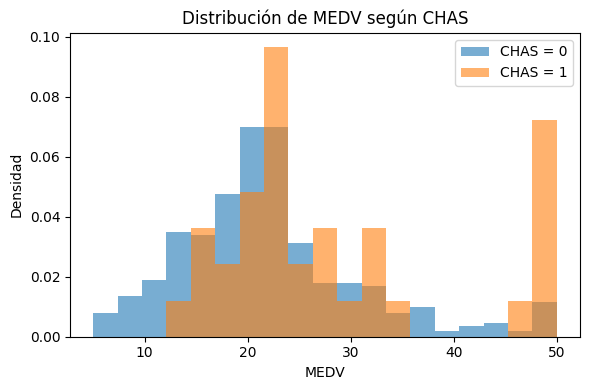

In [9]:
# Histograma de MEDV separado por CHAS, con histogramas sobrepuestos

medv_chas_0 = df[df['CHAS'] == 0]['MEDV']
medv_chas_1 = df[df['CHAS'] == 1]['MEDV']

bins = np.linspace(df['MEDV'].min(), df['MEDV'].max(), 20)

plt.figure(figsize=(6, 4))

plt.hist(medv_chas_0, bins=bins, density=True, alpha=0.6, label='CHAS = 0')
plt.hist(medv_chas_1, bins=bins, density=True, alpha=0.6, label='CHAS = 1')

plt.title('Distribución de MEDV según CHAS')
plt.xlabel('MEDV')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los histogramas, ¿te parece que el atributo CHAS tendrá algún peso a la hora de predecir la mediana del precio de las casas, MEDV? ¿Porqué?
</div>

Las dos distribuciones de MEDV son muy parecidas para CHAS = 0 y CHAS = 1, lo que muestra que vivir cerca del río no cambia de forma notable el precio de las casas. Ambas clases tienen la mayor concentración de valores entre 15 y 25 mil dólares, con una superposición casi total.

La única diferencia visible es que CHAS = 1 presenta algunos valores más altos, cercanos al límite de 50, pero esta señal es débil porque el grupo es muy pequeño. En general, CHAS no parece ser un predictor fuerte de MEDV.

**texto en negrita**<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula y muestra la correlación entre todos los atributos numéricos y la variable respuesta MEDV.
</div>


In [16]:
#Correlacion
correlaciones = df.corr(numeric_only=True)['MEDV'].sort_values(ascending=False)
correlaciones

,MEDV
MEDV,1.000000
RM,0.695360
ZN,0.360445
B,0.333461
DIS,0.249929
CHAS,0.175260
AGE,-0.376955
RAD,-0.381626
CRIM,-0.388305
NOX,-0.427321


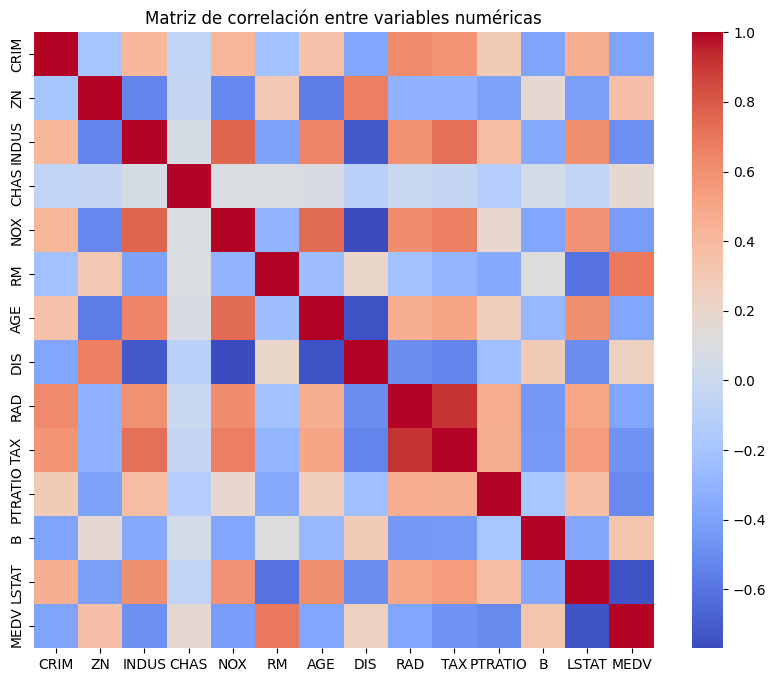

In [17]:
#Mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Representa gráficamente las relaciones entre todas las parejas de variables numéricas (sin incluir la variable respuesta) del conjunto de datos. El objetivo de este ejercicio es observar y analizar gráficamente las correlaciones entre las variables.
<hr>Sugerencia: Puedes usar la función "pairplot" de la librería 'seaborn'.
</div>


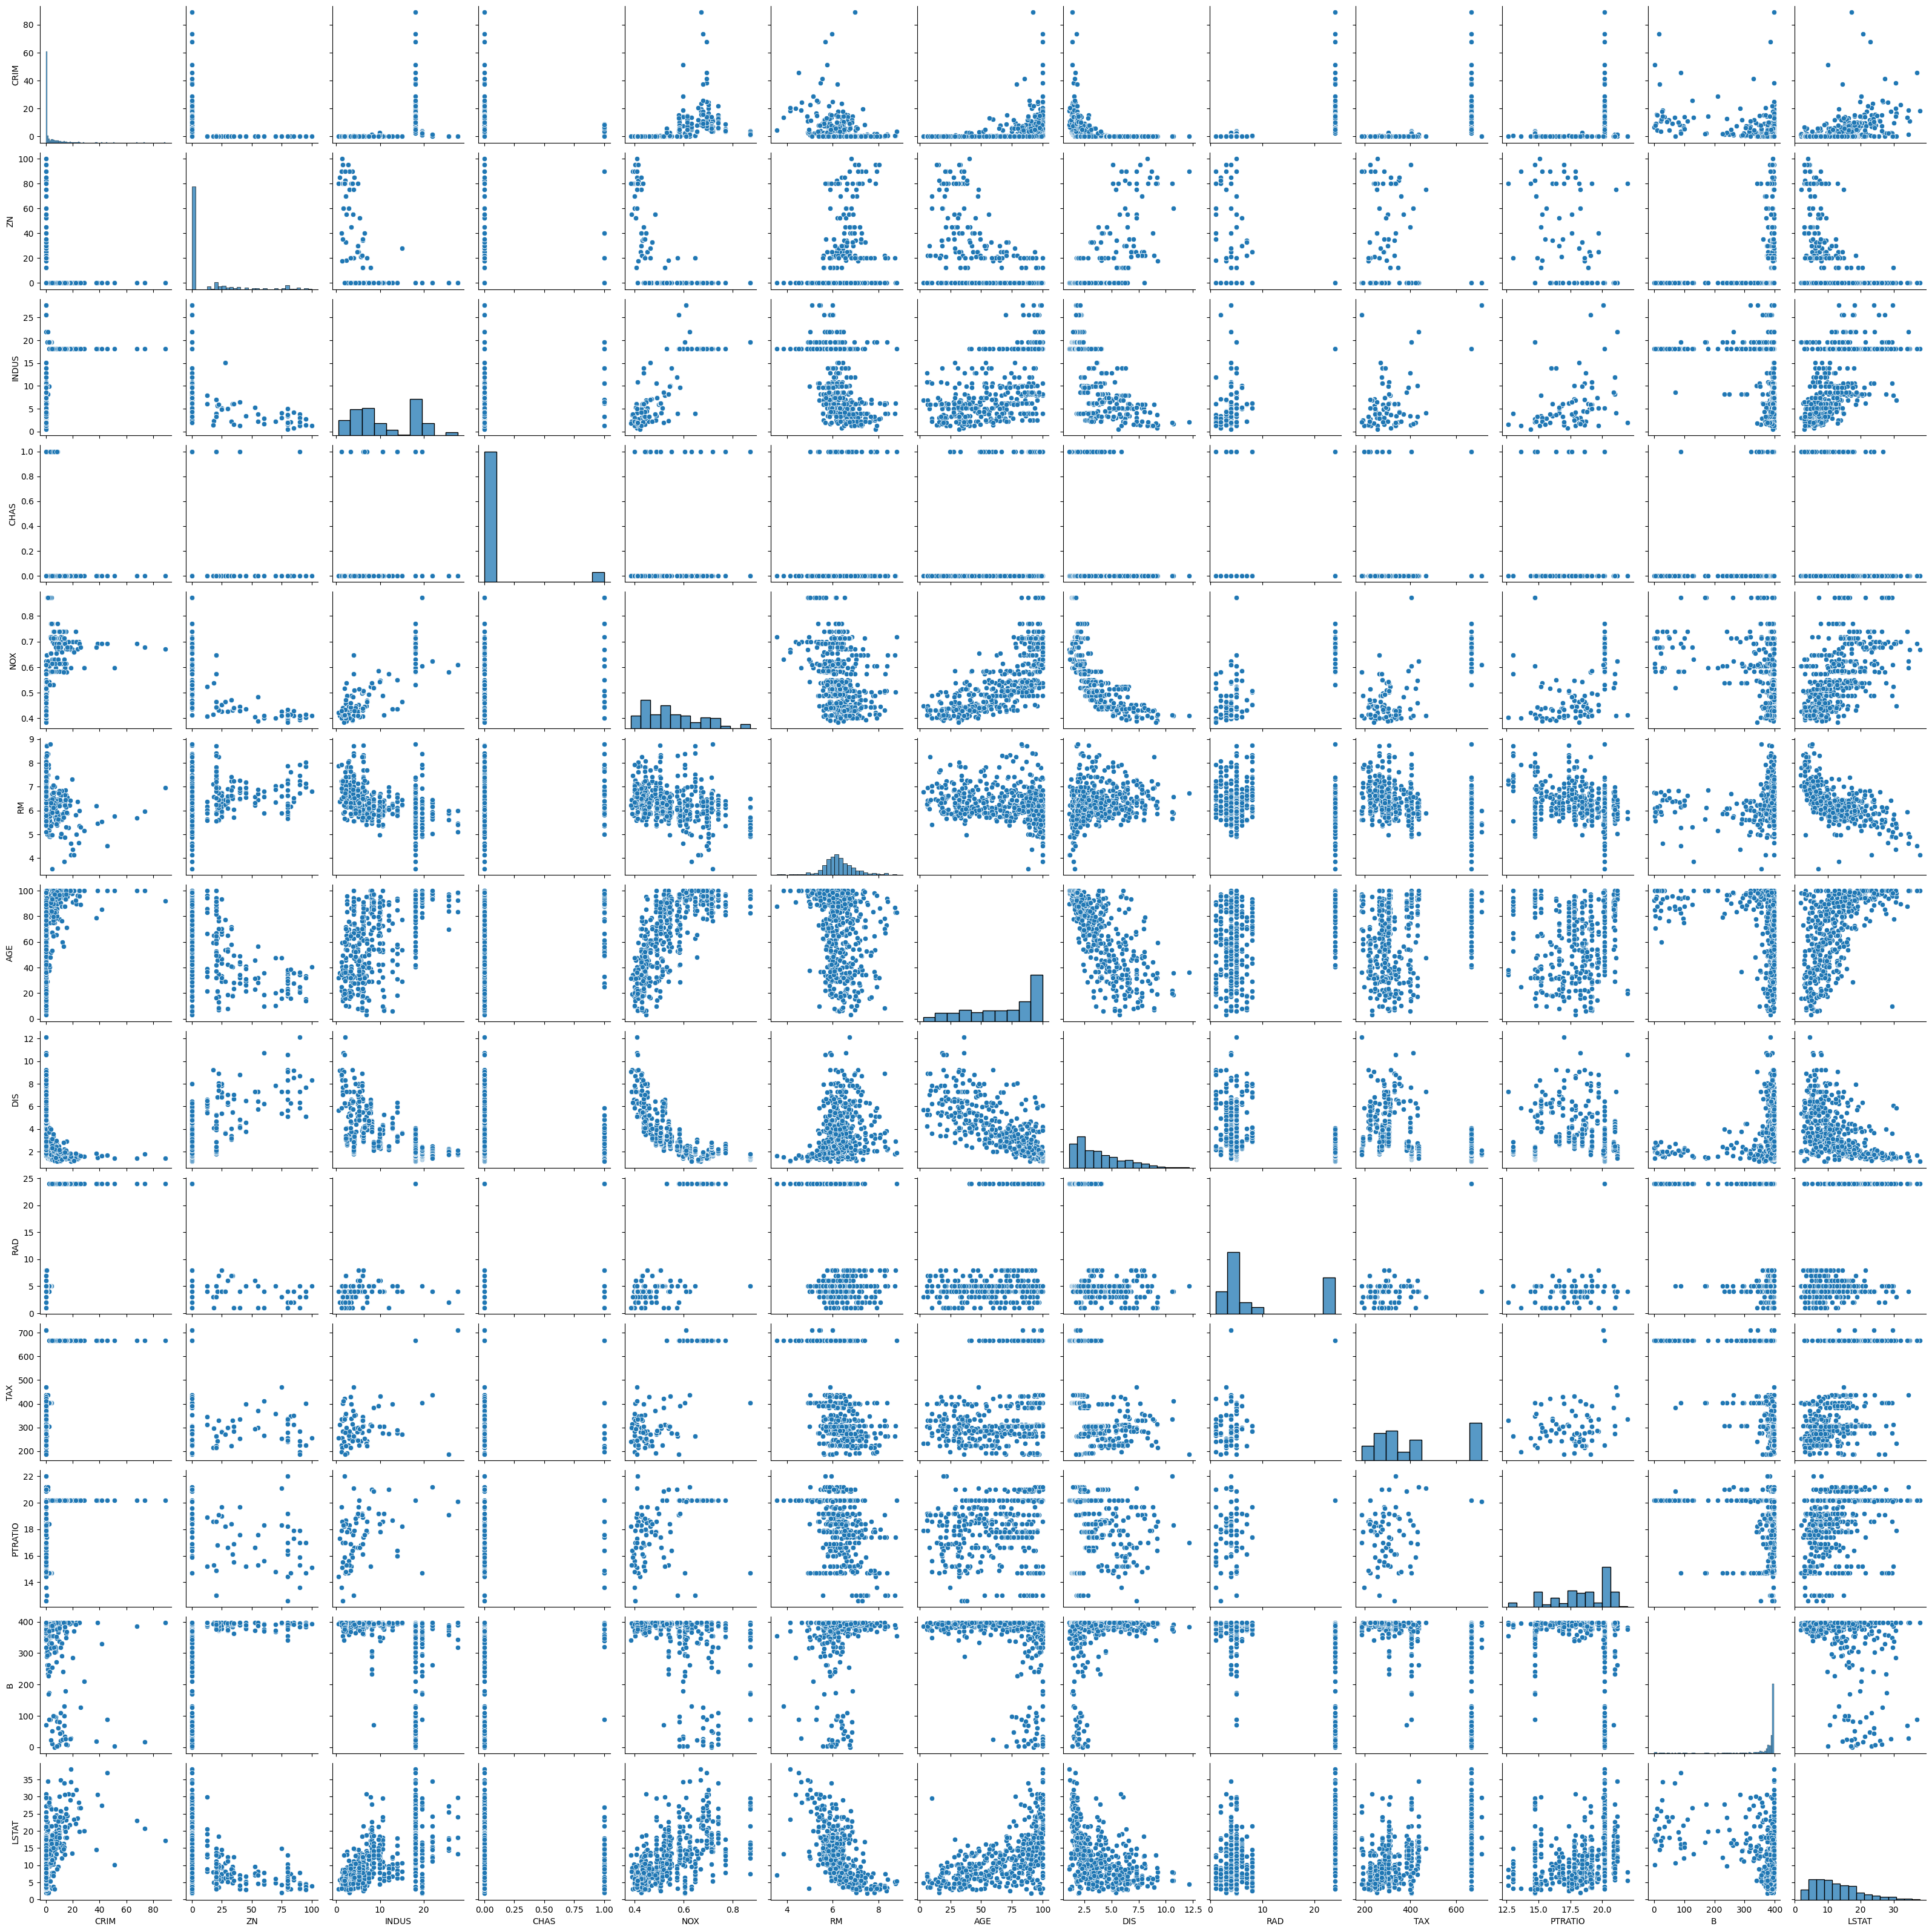

In [19]:
# Pairplot de todas las variables numéricas excepto MEDV
import seaborn as sns
import matplotlib.pyplot as plt

df_num = df.drop(columns=['MEDV'])

sns.pairplot(df_num, diag_kind='hist')
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Identifica los 2 atributos con la correlación más fuerte con la variable respuesta y los 2 con la correlación más débil (considerando el valor absoluto del coeficiente de correlación).
    
Para analizar las correlaciones gráficamente, representa, para cada uno de los 4 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, añade en cada gráfico una regresión lineal que ajuste los puntos.
        
<hr>Sugerencia: Puedes usar la función "regplot" de la librería 'seaborn'.
</div>


In [20]:
correlaciones = df.corr()['MEDV'].sort_values(ascending=False)
correlaciones


,MEDV
MEDV,1.000000
RM,0.695360
ZN,0.360445
B,0.333461
DIS,0.249929
CHAS,0.175260
AGE,-0.376955
RAD,-0.381626
CRIM,-0.388305
NOX,-0.427321


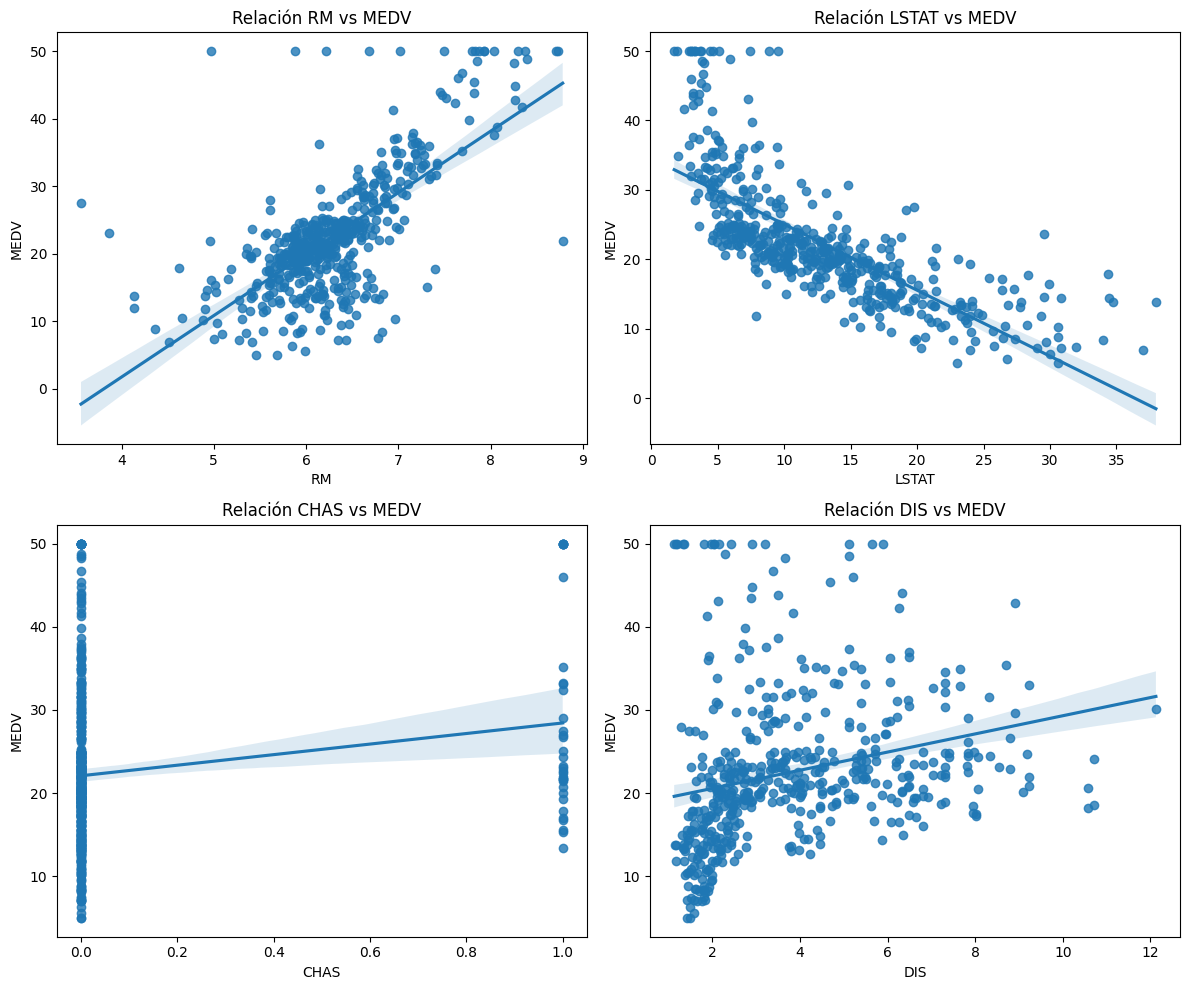

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Más correlacionados
sns.regplot(x='RM', y='MEDV', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Relación RM vs MEDV')

sns.regplot(x='LSTAT', y='MEDV', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Relación LSTAT vs MEDV')

# Menos correlacionados
sns.regplot(x='CHAS', y='MEDV', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Relación CHAS vs MEDV')

sns.regplot(x='DIS', y='MEDV', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Relación DIS vs MEDV')

plt.tight_layout()
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los gráficos, comenta brevemente si logras visualizar las correlaciones altas o bajas que identificaste numéricamente.
</div>


Al observar los gráficos, se confirman visualmente las correlaciones identificadas numéricamente.
Las relaciones fuertes, como RM con MEDV (positiva) y LSTAT con MEDV (negativa), muestran una tendencia clara y una alineación de los puntos con la línea de regresión.
En cambio, las relaciones débiles, como CHAS y DIS con MEDV, presentan mucha dispersión y prácticamente no se logra identificar una tendencia marcada, y esto coincide con sus coeficientes de correlación bajos.




---
## <font color='264CC7'> Reducción de la dimensionalidad </font>


En este ejercicio aplicaremos métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el número de atributos a un nuevo conjunto con menos dimensiones, pero que conserven la máxima información posible presente en los atributos originales.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica el método de reducción de dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Genera un gráfico con el resultado del PCA, mostrando los valores de las dos componentes principales en los ejes x e y, y utilizando una escala de colores para representar el valor de la respuesta MEDV. El objetivo es visualizar cómo varía MEDV en función de las componentes principales generadas.</li>
</ul>
    
NOTA: Asegúrate de no incluir la variable objetivo "MEDV" en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: No necesitas programar el algoritmo de PCA desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


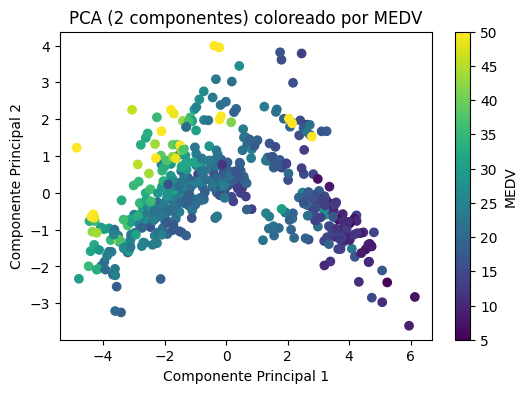

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separar características y variable objetivo
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convertir a DataFrame para graficar
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'MEDV': y
})

# Gráfico
plt.figure(figsize=(6,4))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['MEDV'], cmap='viridis')
plt.colorbar(scatter, label='MEDV')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA (2 componentes) coloreado por MEDV')
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica la reducción de dimensionalidad usando TSNE. Puedes encontrar más información sobre este algoritmo en el siguiente enlace: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, genera un gráfico con el resultado del TSNE, mostrando en los ejes x e y los valores de las 2 nuevas dimensiones, y utiliza una escala de colores para representar el valor de la respuesta MEDV.</li>
</ul>

<hr>
Sugerencia: No necesitas programar el algoritmo TSNE desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Además de especificar el número de componentes, experimenta con los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


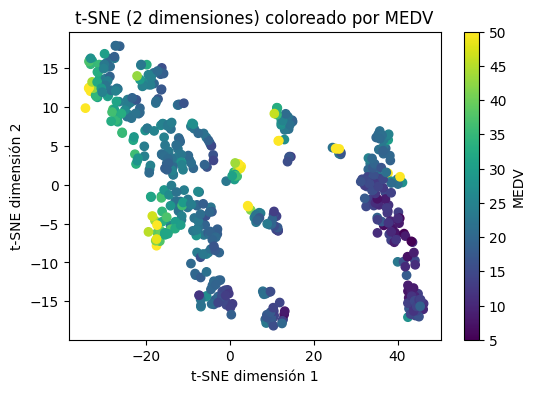

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Separar características y variable objetivo
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# t-SNE a 2 dimensiones
tsne = TSNE(
    n_components=2,
    learning_rate=200,
    perplexity=30,
    random_state=0
)
X_tsne = tsne.fit_transform(X_scaled)

# DataFrame para graficar
df_tsne = pd.DataFrame({
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1],
    'MEDV': y
})

# Gráfico
plt.figure(figsize=(6,4))
scatter = plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'],
                      c=df_tsne['MEDV'], cmap='viridis')
plt.colorbar(scatter, label='MEDV')
plt.xlabel('t-SNE dimensión 1')
plt.ylabel('t-SNE dimensión 2')
plt.title('t-SNE (2 dimensiones) coloreado por MEDV')
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿consideras que la reducción de dimensionalidad ha funcionado adecuadamente? ¿Crees que las 2 nuevas dimensiones logran explicar la variación de MEDV y permiten visualizar de manera diferenciada los precios altos y bajos? Si utilizáramos las 2 nuevas variables para predecir MEDV, ¿con cuál de los dos métodos de reducción de dimensionalidad (PCA o TSNE) obtendríamos mejores resultados?
    
¿Por qué crees que obtenemos resultados tan diferentes entre ambos métodos?
</div>


La reducción de dimensionalidad funciona, pero cada método ofrece resultados distintos. PCA muestra un espacio más ordenado y con un gradiente de colores claro, lo que permite ver cómo cambian los valores de MEDV de forma continua. Esto indica que las dos nuevas dimensiones conservan una parte importante de la variación del precio.

En cambio, t-SNE produce un mapa más fragmentado y con grupos dispersos, donde los valores de MEDV no siguen una estructura tan clara. El método enfatiza relaciones muy locales y por eso la visualización luce más dispersa y menos útil para explicar diferencias de precio.

Si tuviéramos que predecir MEDV usando solo dos dimensiones, PCA sería la mejor opción porque mantiene patrones globales y una transición visible entre precios altos y bajos.

La diferencia entre ambos métodos se debe a que PCA trabaja de forma lineal y conserva la varianza general, mientras que t-SNE prioriza similitudes locales, lo que genera una representación más irregular.

---
## <font color='264CC7'> Entrenamiento y test </font>

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Linear Regression y K-means, para predecir las variables MEDV y CHAS, resectivamente, y evaluar la precisión obtenida con los modelo. Para eso usaremos:
<ul>
    <li>El conjunto de datos original con todos los atributos</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con PCA</li>
</ul>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

In [25]:
from sklearn.model_selection import train_test_split

# Variables para regresión
X_reg = df.drop("MEDV", axis=1)
y_reg = df["MEDV"]

# Variables para clasificación
X_clf = df.drop("CHAS", axis=1)
y_clf = df["CHAS"]

# Último dígito de tu cédula
rand = 0

# División regresión
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=rand
)

# División clasificación
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=rand
)

Xr_train.shape, Xr_test.shape, Xc_train.shape, Xc_test.shape


((404, 13), (102, 13), (404, 13), (102, 13))

In [26]:
# Dataset PCA para regresión
Xpca_reg = X_pca
ypca_reg = df["MEDV"]

# Dataset PCA para clasificación
Xpca_clf = X_pca
ypca_clf = df["CHAS"]

# División regresión PCA
Xpr_train, Xpr_test, ypr_train, ypr_test = train_test_split(
    Xpca_reg, ypca_reg, test_size=0.2, random_state=rand
)

# División clasificación PCA
Xpc_train, Xpc_test, ypc_train, ypc_test = train_test_split(
    Xpca_clf, ypca_clf, test_size=0.2, random_state=rand
)

Xpr_train.shape, Xpr_test.shape, Xpc_train.shape, Xpc_test.shape


((404, 2), (102, 2), (404, 2), (102, 2))

### <font color='264CC7'> Regresión </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo Linear Regression.</li>
    <li>Aplica validación cruzada con el modelo definido y el dataset de train (con cv=5 es suficiente).</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza R2 (coeficiente de determinación) y MAE (media del error absoluto) separadamente.</li>
    <li>Calcula la media y la desviación estándar del error obtenido en cada caso.</li>
</ul>
    
<hr>
Sugerencia: Para aplicar validación cruzada, utiliza 'cross_val_score' de sklearn y modifica su parámetro 'scoring' si es necesario.<br>
</div>


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

r2_scores = cross_val_score(model, Xr_train, yr_train, cv=5, scoring="r2")
mae_scores = -cross_val_score(model, Xr_train, yr_train, cv=5, scoring="neg_mean_absolute_error")

print("R2 media:", r2_scores.mean())
print("R2 desviación:", r2_scores.std())
print("MAE media:", mae_scores.mean())
print("MAE desviación:", mae_scores.std())


R2 media: 0.7486772007604269
R2 desviación: 0.04865733736542031
MAE media: 3.2198365929547004
MAE desviación: 0.24116445390195335


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [31]:
from sklearn.model_selection import train_test_split

# Separación de datos PCA
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=9
)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np

# Modelo
modelo_pca = LinearRegression()

# Validación cruzada con R2
r2_scores_pca = cross_val_score(modelo_pca, X_train_pca, y_train,
                                cv=5, scoring='r2')

# Validación cruzada con MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mae_scores_pca = cross_val_score(modelo_pca, X_train_pca, y_train,
                                 cv=5, scoring=mae_scorer)

# Resultados finales
print("R2 media (PCA):", np.mean(r2_scores_pca))
print("R2 desviación (PCA):", np.std(r2_scores_pca))

print("MAE media (PCA):", -np.mean(mae_scores_pca))
print("MAE desviación (PCA):", np.std(-mae_scores_pca))


R2 media (PCA): 0.433693009429446
R2 desviación (PCA): 0.12924885630441607
MAE media (PCA): 4.815836036049063
MAE desviación (PCA): 0.8053885781000021


**texto en negrita**<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Con qué datos ha funcionado mejor el modelo? ¿Tiene sentido el resultado? ¿Está alineado con los resultados observados en el ejercicio 3?
</div>


El modelo funciona mejor con el dataset original, porque conserva toda la información necesaria para predecir MEDV. En la versión reducida con PCA solo quedan dos dimensiones y se pierde detalle importante, lo que afecta el rendimiento.

El resultado tiene sentido y coincide con lo visto antes, donde las dos componentes principales no lograban diferenciar bien los valores altos y bajos de MEDV. Por eso era esperado que el modelo reduzca su precisión al usar únicamente esas dos variables.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Con el mejor modelo que hayas obtenido:
    
<ul>
  <li>Genera predicciones sobre el dataset de test.</li>
  <li>Calcula la precisión de las predicciones obtenidas usando R2 (coeficiente de determinación) y MAE (media del error absoluto).</li>
</ul>

<hr>
Sugerencia: Para calcular R2 y MAE, utiliza las funciones disponibles en el módulo "metrics" de sklearn.
</div>


In [35]:
# Separar variables predictoras y variable objetivo
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

# Split de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Entrenar el modelo con datos originales
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

mejor_modelo = LinearRegression()
mejor_modelo.fit(X_train, y_train)

# Predicciones
y_pred = mejor_modelo.predict(X_test)

# Métricas
r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

r2_test, mae_test


(0.5892223849182525, 3.8429092204444983)

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (R2 o MAE) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué?  
</div>


A un ejecutivo le explicaría el MAE porque muestra directamente cuánto se está equivocando el modelo en dinero, algo fácil de interpretar para decisiones comerciales. A un analista matemático le explicaría el R2 porque refleja qué tan bien el modelo logra capturar la variabilidad real del precio y permite comparar modelos desde una perspectiva más técnica y estadística.

### <font color='264CC7'> Clasificación </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo K-means.</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza la precisión, la sensibilidad y f1-score.</li>
</ul>



In [37]:
cedula = 0

In [39]:
from sklearn.model_selection import train_test_split

X_clf = df.drop("CHAS", axis=1)
y_clf = df["CHAS"]

rand = 0  # último dígito de tu cédula

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=rand
)


In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=rand, n_init=10)
kmeans.fit(Xc_train)


KMeans(n_clusters=2, n_init=10, random_state=0)

In [41]:
import numpy as np

cluster_train = kmeans.predict(Xc_train)
cluster_test = kmeans.predict(Xc_test)

mapping = {}
for c in [0, 1]:
    mask = cluster_train == c
    mapping[c] = int(yc_train[mask].mean() >= 0.5)

y_pred_kmeans = np.array([mapping[c] for c in cluster_test])


In [42]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

precision = accuracy_score(yc_test, y_pred_kmeans)
sensibilidad = recall_score(yc_test, y_pred_kmeans)
f1 = f1_score(yc_test, y_pred_kmeans)

precision, sensibilidad, f1


(0.9313725490196079, 0.0, 0.0)

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">

> Agregar bloque entrecomillado


<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, recall_score, f1_score
import numpy as np

# 1. Datos para clasificación
X_clf = df.drop("CHAS", axis=1)
y_clf = df["CHAS"]

# 2. Escalado y PCA a 2 dimensiones
scaler = StandardScaler()
X_clf_scaled = scaler.fit_transform(X_clf)

pca = PCA(n_components=2)
X_clf_pca = pca.fit_transform(X_clf_scaled)

# 3. Train test split
rand = 0
Xc_train_pca, Xc_test_pca, yc_train, yc_test = train_test_split(
    X_clf_pca, y_clf, test_size=0.2, random_state=rand
)

# 4. K-means en el espacio PCA
kmeans_pca = KMeans(n_clusters=2, random_state=rand, n_init=10)
kmeans_pca.fit(Xc_train_pca)

cluster_train_pca = kmeans_pca.predict(Xc_train_pca)
cluster_test_pca = kmeans_pca.predict(Xc_test_pca)

# 5. Mapear clusters a clases CHAS
mapping_pca = {}
for c in [0, 1]:
    mask = cluster_train_pca == c
    mapping_pca[c] = int(yc_train[mask].mean() >= 0.5)

y_pred_kmeans_pca = np.array([mapping_pca[c] for c in cluster_test_pca])

# 6. Métricas
precision_pca = accuracy_score(yc_test, y_pred_kmeans_pca)
sensibilidad_pca = recall_score(yc_test, y_pred_kmeans_pca)
f1_pca = f1_score(yc_test, y_pred_kmeans_pca)

precision_pca, sensibilidad_pca, f1_pca


(0.9313725490196079, 0.0, 0.0)

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (precisión, sensibilidad o f1-score) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué? ¿El modelo es mejor discriminando o acertando? ¿Cómo se interpreta esto último?


A un ejecutivo le explicaría la precisión porque muestra qué tanto acierta el modelo en general y es la métrica más fácil de entender para evaluar si el sistema “funciona”. A un analista matemático le explicaría el f1-score porque refleja el equilibrio entre aciertos de la clase positiva y negativa y permite ver si el modelo realmente discrimina bien entre categorías.

El modelo está acertando más de lo que discrimina. Esto significa que identifica correctamente la clase dominante, pero no logra distinguir los casos donde CHAS vale uno. En la práctica, acierta por cantidad y no por calidad, lo que indica un sesgo hacia la clase mayoritaria.